# CS 145 COVID Prediction

## Loading Data

First we need to load the data, which is stored in CSV files separated by date

In [95]:
import numpy as np
import pandas as pd
import glob
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [96]:
# grab filepaths for every csv file
datapath = 'data/csse_covid_19_daily_reports_us/*.csv'
datafiles = np.array(glob.glob(datapath))
print(datafiles[138:142])

['data/csse_covid_19_daily_reports_us/09-20-2020.csv'
 'data/csse_covid_19_daily_reports_us/05-09-2020.csv'
 'data/csse_covid_19_daily_reports_us/05-08-2020.csv'
 'data/csse_covid_19_daily_reports_us/08-23-2020.csv']


In [97]:
# init giant df
data = pd.read_csv(datafiles[0])
# read and append each csv to the master df
for i in range(1, len(datafiles)):
    df = pd.read_csv(datafiles[i])
    data = data.append(df, ignore_index = True)
# only keep 50 states
data.drop(data[data.Province_State.isin(['Diamond Princess', 'District of Columbia', 'Grand Princess', 'Guam', 'Puerto Rico', 'American Samoa', 'Northern Mariana Islands', 'Recovered', 'Virgin Islands'])].index, inplace = True)
data.drop(columns = ['Country_Region', 'FIPS', 'UID', 'ISO3'], inplace = True)
data['Last_Update'] = data['Last_Update'].astype('datetime64[ns]')
data = data.reset_index(drop=True)
data.loc[48:52, ]

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
48,Wisconsin,2020-06-08 03:33:42,44.2685,-89.6165,20835,647,14047.0,6141.0,357.840037,346702.0,2848.0,3.105352,5954.588751,13.669306
49,Wyoming,2020-06-08 03:33:42,42.7560,-107.3025,947,17,757.0,173.0,163.625965,28751.0,90.0,1.795143,4967.698127,9.503696
50,Alabama,2020-06-07 03:53:50,32.3182,-86.9023,20043,689,11395.0,7959.0,408.775113,245644.0,1993.0,3.437609,5009.886431,9.943621
51,Alaska,2020-06-07 03:53:50,61.3707,-152.4044,535,10,382.0,143.0,73.132890,63901.0,48.0,1.869159,8735.074397,8.971963
52,Arizona,2020-06-07 03:53:50,33.7298,-111.4312,25451,1043,5399.0,19009.0,349.663272,271646.0,3320.0,4.098071,3732.058823,13.044674


## Data Cleaning

In [98]:
data = pd.concat([data, pd.get_dummies(data['Province_State'])], axis = 1)
statenames = np.unique(data['Province_State'])
#data.drop(columns = ['Province_State'], inplace = True)
names = list(data.columns.values)
timestamps = data['Last_Update']
states = data['Province_State']
data.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,418.095585,259566.0,...,0,0,0,0,0,0,0,0,0,0
1,Alaska,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,74.226466,64904.0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,370.793369,281621.0,...,0,0,0,0,0,0,0,0,0,0
3,Arkansas,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,312.346329,160273.0,...,0,0,0,0,0,0,0,0,0,0
4,California,2020-06-08 03:33:42,36.1162,-119.6816,130615,4632,NaN,125983.0,330.568594,2362218.0,...,0,0,0,0,0,0,0,0,0,0


We impute NA values using KNN with k = 10.

In [99]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")
data = pd.DataFrame(data = imputer.fit_transform(data.drop(columns = ['Province_State', 'Last_Update'])), columns = names[2:])
data = pd.concat([states, timestamps, data], axis = 1)
data.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alabama,2020-06-08 03:33:42,32.3182,-86.9023,20500.0,692.0,11395.0,8413.0,418.095585,259566.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,2020-06-08 03:33:42,61.3707,-152.4044,543.0,10.0,382.0,151.0,74.226466,64904.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,2020-06-08 03:33:42,33.7298,-111.4312,26989.0,1051.0,5517.0,20421.0,370.793369,281621.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arkansas,2020-06-08 03:33:42,34.9697,-92.3731,9426.0,154.0,6424.0,2848.0,312.346329,160273.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,2020-06-08 03:33:42,36.1162,-119.6816,130615.0,4632.0,23224.4,125983.0,330.568594,2362218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
print(data['Last_Update'])

0      2020-06-08 03:33:42
1      2020-06-08 03:33:42
2      2020-06-08 03:33:42
3      2020-06-08 03:33:42
4      2020-06-08 03:33:42
               ...        
9645   2020-04-25 06:32:46
9646   2020-04-25 06:32:46
9647   2020-04-25 06:32:46
9648   2020-04-25 06:32:46
9649   2020-04-25 06:32:46
Name: Last_Update, Length: 9650, dtype: datetime64[ns]


In [101]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## NN

In [102]:
cali = data[data.Province_State.isin(['California'])]
cali = cali.sort_values(by=['Last_Update'])
cali = cali.drop(columns = ['Province_State'])
cali = cali.drop(columns = states)
cali = cali.drop(columns = ['Lat', 'Long_'])
# cali['Last_Update'] = cali['Last_Update'].astype(int)
date_time = pd.to_datetime(cali.pop('Last_Update'), format='%Y-%m-%d %H:%M:%S')
cali

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
3054,22795.0,640.0,4283.8,22155.0,58.137726,190328.0,5234.0,2.812020,485.423868,22.961176
3104,23931.0,714.0,3891.9,23217.0,61.035048,190882.0,3015.0,2.987756,486.836823,12.598721
1754,25356.0,767.0,4297.1,24589.0,64.669453,202208.0,5163.0,3.028869,515.723328,20.362044
1704,26686.0,860.0,5009.2,25826.0,68.061564,216486.0,5163.0,3.226411,552.138790,19.347223
4904,27677.0,956.0,4647.4,26721.0,70.589069,246400.0,5031.0,3.457745,628.433237,18.177548
...,...,...,...,...,...,...,...,...,...,...
954,873614.0,16956.0,78159.3,856658.0,2210.996835,16756711.0,89995.0,1.940903,42408.930016,20.961681
8404,875692.0,16979.0,78159.3,858713.0,2216.255967,16892062.0,89995.0,1.938924,42751.484775,20.961681
8454,879645.0,16982.0,78159.3,862663.0,2226.260466,17042408.0,89995.0,1.930552,43131.989815,20.961681
5354,883746.0,17055.0,78159.3,866691.0,2236.639533,17189070.0,89995.0,1.929853,43503.171158,20.961681


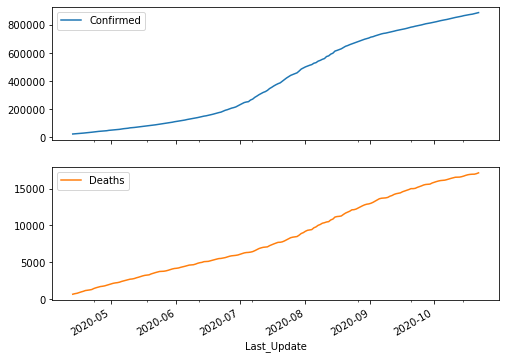

In [103]:
plot_cols = ['Confirmed', 'Deaths']
plot_features = cali[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [104]:
cali.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,193.0,4.119138e+05,3.037340e+05,22795.000000,1.098950e+05,3.732590e+05,7.260180e+05,8.869390e+05
Deaths,193.0,8.530420e+03,5.126783e+03,640.000000,4.144000e+03,7.603000e+03,1.349300e+04,1.716700e+04
Recovered,193.0,5.192877e+04,3.040751e+04,0.000000,2.210780e+04,7.390010e+04,7.765740e+04,8.418780e+04
Active,193.0,4.033834e+05,2.986469e+05,22155.000000,1.057510e+05,3.656560e+05,7.125250e+05,8.697720e+05
Incident_Rate,193.0,1.042648e+03,7.685286e+02,58.137726,2.781291e+02,9.446672e+02,1.837452e+03,2.244721e+03
People_Tested,193.0,6.982820e+06,5.371406e+06,190328.000000,1.888595e+06,6.044099e+06,1.166392e+07,1.729314e+07
People_Hospitalized,193.0,6.239548e+04,3.708960e+04,3015.000000,1.416310e+04,8.999500e+04,8.999500e+04,8.999500e+04
Mortality_Rate,193.0,2.644107e+00,8.899810e-01,1.794682,1.885005e+00,2.036923e+00,3.601934e+00,4.096960e+00
Testing_Rate,193.0,1.767442e+04,1.359210e+04,485.423868,4.779774e+03,1.529678e+04,2.951979e+04,4.376656e+04
Hospitalization_Rate,193.0,1.829384e+01,4.309352e+00,8.125463,1.448532e+01,2.096168e+01,2.096168e+01,2.306528e+01


In [105]:
date_time

3054   2020-04-12 23:18:15
3104   2020-04-13 23:07:54
1754   2020-04-14 23:33:31
1704   2020-04-15 22:56:51
4904   2020-04-16 23:30:51
               ...        
954    2020-10-18 04:30:24
8404   2020-10-19 04:30:24
8454   2020-10-20 04:30:29
5354   2020-10-21 04:30:32
5304   2020-10-22 04:30:36
Name: Last_Update, Length: 193, dtype: datetime64[ns]

In [106]:
df = cali
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df
val_df = train_df
test_df = train_df

num_features = df.shape[1]

In [107]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

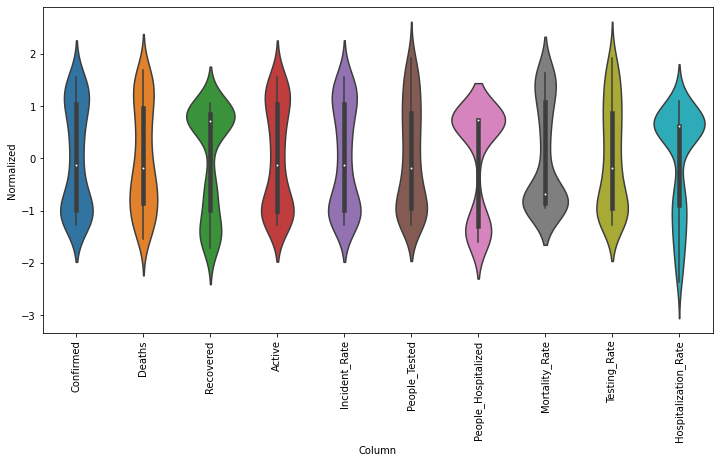

In [108]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [109]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [110]:
w1 = WindowGenerator(input_width=142, label_width=1, shift=26,
                     label_columns=['Confirmed'])
w1

Total window size: 168
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141]
Label indices: [167]
Label column name(s): ['Confirmed']

In [111]:
w2 = WindowGenerator(input_width=142, label_width=1, shift=26,
                     label_columns=['Deaths'])
w2

Total window size: 168
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141]
Label indices: [167]
Label column name(s): ['Deaths']

In [112]:
w2.total_window_size

168

In [113]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [114]:
train_df.shape

(193, 10)

In [115]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[12:12+w2.total_window_size]),
                           np.array(train_df[24:24+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 168, 10)
Inputs shape: (3, 142, 10)
labels shape: (3, 1, 1)


In [116]:
w2.example = example_inputs, example_labels

In [117]:
def plot(self, model=None, plot_col='Deaths', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [days]')

WindowGenerator.plot = plot

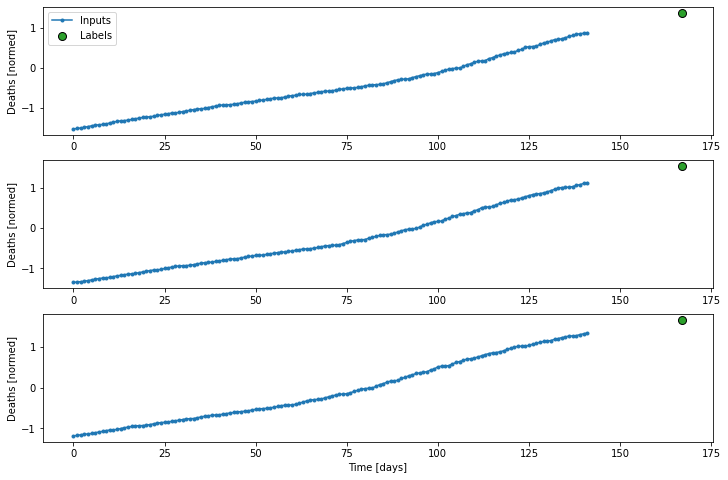

In [118]:
w2.plot()

In [119]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [120]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [121]:
w2.train.element_spec

(TensorSpec(shape=(None, 142, 10), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [122]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Deaths'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Deaths']

In [123]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 10)
Labels shape (batch, time, features): (32, 1, 1)


In [125]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [126]:
baseline = Baseline(label_index=column_indices['Deaths'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

6/6 [==============================] - 0s 990us/step - loss: 3.7403e-04 - mean_absolute_error: 0.0168


In [130]:
wide_window = WindowGenerator(
    input_width=142, label_width=26, shift=1,
    label_columns=['Deaths'])

wide_window

Total window size: 143
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141]
Label indices: [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142]
Label column name(s): ['Deaths']

In [131]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [132]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [133]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
6/6 [==============================] - 0s 42ms/step - loss: 1.6979 - mean_absolute_error: 1.1527 - val_loss: 1.6179 - val_mean_absolute_error: 1.1241
Epoch 2/20
6/6 [==============================] - 0s 20ms/step - loss: 1.5625 - mean_absolute_error: 1.1040 - val_loss: 1.4916 - val_mean_absolute_error: 1.0782
Epoch 3/20
6/6 [==============================] - 0s 21ms/step - loss: 1.4401 - mean_absolute_error: 1.0589 - val_loss: 1.3710 - val_mean_absolute_error: 1.0325
Epoch 4/20
6/6 [==============================] - 0s 17ms/step - loss: 1.3250 - mean_absolute_error: 1.0135 - val_loss: 1.2574 - val_mean_absolute_error: 0.9873
Epoch 5/20
6/6 [==============================] - 0s 18ms/step - loss: 1.2127 - mean_absolute_error: 0.9693 - val_loss: 1.1527 - val_mean_absolute_error: 0.9436
Epoch 6/20
6/6 [==============================] - 0s 15ms/step - loss: 1.1138 - mean_absolute_error: 0.9263 - val_loss: 1.0547 - val_mean_absolute_error: 0.9007
Epoch 7/20
6/6 [==================

In [135]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 142, 10)
Output shape: (32, 142, 1)


ValueError: x and y must be the same size

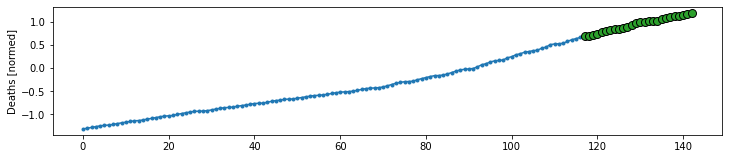

In [136]:
wide_window.plot(linear)

In [138]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [139]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [141]:
def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

In [142]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([26, 10])

In [145]:
def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the lstm state
    prediction, state = self.warmup(inputs)

    # Insert the first prediction
    predictions.append(prediction)

    # Run the rest of the prediction steps
    for n in range(1, self.out_steps):
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state,
                                  training=training)
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call

In [146]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (26, 26, 10)


1/1 [==============================] - 0s 1ms/step - loss: 0.4707 - mean_absolute_error: 0.5445


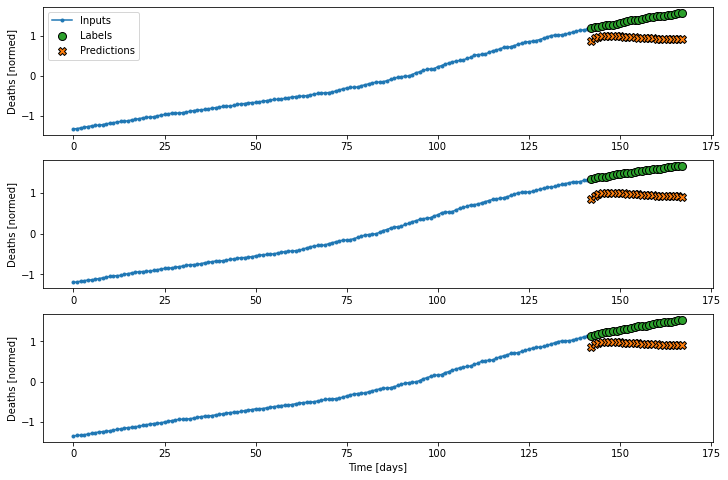

In [147]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## Additional Features

We will hard code each state's overall political stance in 2020, with 3 indicating safe, 2 indicating likely, 1 indicating leaning, and 0 indicating none. Thus the parameters "dem" and "rep" are ordinal while "swing" is a dummy variable. Because Maine and Nebraska allow split voting, we will consider Maine likely democratic and Nebraska likely republican. The source of the data is from https://www.270towin.com/

We will also include whether a state has enacted a mandatory mask mandate, the data for which is from [Axios](https://www.axios.com/states-face-coverings-mandatory-a0e2fe35-5b7b-458e-9d28-3f6cdb1032fb.html). This will be dummy coded.

In [ ]:
dem = [0, 0, 1, 0, 3, 2, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 3, 3, 1, 2, 0, 0, 0, 0, 1, 1, 3, 2, 3, 0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 3, 2, 3, 0, 1, 0]
rep = [3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 3, 3, 1, 2, 0, 0, 0, 3, 0, 3]
swing = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mask = [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [ ]:
# repeats an array, e.gg [1,2,3] 2 times is [1,2,3,1,2,3]
def repeat(dat, times):
    temp = dat
    for i in range(int(times) - 1):
        temp = np.append(temp, dat)
    return temp

times = data.shape[0] / 50
data['dem'] = repeat(dem, times)
data['rep'] = repeat(rep, times)
data['swing'] = repeat(swing, times)
data['mask'] = repeat(mask, times)

In [ ]:
data_sort = data[['Province_State', 'Last_Update', 'Confirmed']].sort_values(by = ['Province_State', 'Last_Update'])
cols = data_sort[['Province_State', 'Last_Update']].loc[data_sort['Province_State'] == 'Alabama']
new = data_sort['Confirmed'].loc[data_sort['Province_State'] == 'Alabama']
new = pd.Series(np.append(new.iloc[0], new.iloc[0:len(new) - 1]), index = data_sort.loc[data_sort['Province_State'] == 'Alabama'].index)
df = pd.concat([cols, data_sort['Confirmed'].loc[data_sort['Province_State'] == 'Alabama'] - new], axis = 1)
df.columns.values[2] = 'New_Confirmed'

for state in statenames[1:len(statenames)]:
    cols = data_sort[['Province_State', 'Last_Update']].loc[data_sort['Province_State'] == state]
    new = data_sort['Confirmed'].loc[data_sort['Province_State'] == state]
    new = pd.Series(np.append(new.iloc[0], new.iloc[0:len(new) - 1]), index = data_sort.loc[data_sort['Province_State'] == state].index)
    temp = pd.concat([cols, data_sort['Confirmed'].loc[data_sort['Province_State'] == state] - new], axis = 1)
    temp.columns.values[2] = 'New_Confirmed'
    df = df.append(temp)

data = pd.concat([data, df.sort_values(by = ['Last_Update', 'Province_State'])[['New_Confirmed']]], axis = 1)      

In [ ]:
data_sort = data[['Province_State', 'Last_Update', 'Deaths']].sort_values(by = ['Province_State', 'Last_Update'])
cols = data_sort[['Province_State', 'Last_Update']].loc[data_sort['Province_State'] == 'Alabama']
new = data_sort['Deaths'].loc[data_sort['Province_State'] == 'Alabama']
new = pd.Series(np.append(new.iloc[0], new.iloc[0:len(new) - 1]), index = data_sort.loc[data_sort['Province_State'] == 'Alabama'].index)
df = pd.concat([cols, data_sort['Deaths'].loc[data_sort['Province_State'] == 'Alabama'] - new], axis = 1)
df.columns.values[2] = 'New_Deaths'

for state in statenames[1:len(statenames)]:
    cols = data_sort[['Province_State', 'Last_Update']].loc[data_sort['Province_State'] == state]
    new = data_sort['Deaths'].loc[data_sort['Province_State'] == state]
    new = pd.Series(np.append(new.iloc[0], new.iloc[0:len(new) - 1]), index = data_sort.loc[data_sort['Province_State'] == state].index)
    temp = pd.concat([cols, data_sort['Deaths'].loc[data_sort['Province_State'] == state] - new], axis = 1)
    temp.columns.values[2] = 'New_Deaths'
    df = df.append(temp)

data = pd.concat([data, df.sort_values(by = ['Last_Update', 'Province_State'])[['New_Deaths']]], axis = 1)    
data.head()

Next we split the data into training and testing sets.

In [ ]:
train = data.drop(data[data.Last_Update.astype('datetime64[ns]') > '2020-09-01'].index)
#train.drop(columns = "Last_Update", inplace = True)
test = data.drop(data[(data.Last_Update.astype('datetime64[ns]') <= '2020-09-01')].index)
test.drop(test[(test.Last_Update.astype('datetime64[ns]') > '2020-09-27')].index, inplace = True)
#test.drop(columns = "Last_Update", inplace = True)

In [ ]:
train.head()

## Auto ARIMA Predictions

Uses a brute force search to find parameters with lowest AIC per state and makes predictions per state.

In [ ]:
import datetime
base = datetime.date(2020, 9, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(26)]
for i in range(len(date_list)):
    date_list[i] = date_list[i].strftime("%m/%d/%Y")

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
numdays = 26
pred = pd.DataFrame(columns = ['Province_State', 'Date', 'Confirmed'])
for state in statenames:
    temp = pd.concat([pd.Series(np.repeat(state, repeats = numdays)), pd.Series(date_list)], axis = 1)
    train_con = train_data[['Confirmed']].loc[train_data[state] == 1]
    stepwise_model = auto_arima(train_con.Confirmed, start_p=0, start_q=1,
                           max_p=10, max_q=3, m=12,
                           d=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    history = [x for x in train_con.Confirmed]
    predictions = list()
    for t in range(numdays):
        model = ARIMA(history, order = stepwise_model.order)
        model_fit = model.fit()
        output = model_fit.forecast()
        predictions.append(output[0])
        history.append(output[0])
    temp = pd.concat([temp, pd.Series(predictions)], axis = 1)
    temp.columns = ['Province_State', 'Date', 'Confirmed']
    pred = pred.append(temp)


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
numdays = 26
pred_death = pd.DataFrame(columns = ['Province_State', 'Date', 'Deaths'])
for state in statenames:
    temp = pd.concat([pd.Series(np.repeat(state, repeats = numdays)), pd.Series(date_list)], axis = 1)
    train_death = train_data[['Deaths']].loc[train_data[state] == 1]
    print(state)
    stepwise_model = auto_arima(train_death.Deaths, start_p=0, start_q=1,
                           max_p=10, max_q=3, m=12,
                           d=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    history = [x for x in train_death.Deaths]
    predictions = list()
    for t in range(numdays):
        if (state == 'New York'):
            model = ARIMA(history, order = (1,2,2))
        else:
            model = ARIMA(history, order = stepwise_model.order)
        model_fit = model.fit()
        output = model_fit.forecast()
        predictions.append(output[0])
        history.append(output[0])
    temp = pd.concat([temp, pd.Series(predictions)], axis = 1)
    temp.columns = ['Province_State', 'Date', 'Deaths']
    pred_death = pred_death.append(temp)


In [ ]:
pred2 = pred
pred2['Deaths'] = pred_death['Deaths']
pred2 = pred2.sort_values(by = ['Date', 'Province_State']).reset_index(drop = True)
pred2 = pred2.drop(columns = ['Province_State', 'Date'])
pred2.index.name = 'ForecastID'

In [ ]:
actual = test_data[['Confirmed', 'Deaths']]
mape = np.absolute(np.array(pred2[['Confirmed', 'Deaths']]) - actual) / np.array(actual)
mape = np.sum(mape, axis = 0) / len(pred2)
#mape = np.sum(mape) / (2 * len(pred2))
mape

In [ ]:
pred2.to_csv("Team1_AutoARIMA.csv")

Calculated MAPE does not seem to match the Kaggle calculation exactly for some reason.

## Archived Code

We will add a parameter for the number of days since Jan 1st, which will eventually replace the timestamps.


In [ ]:
import datetime
# add a column for days since Jan 1st(will eventually remove timestamp)
# too lazy to vectorize
days = np.zeros(len(data.index))
for i in range(len(data.index)):
    days[i] = (data['Last_Update'][i].date() - datetime.date(2020, 1, 1)).days
data['days'] = days

data.head()